# This is just a notebook to visualise 1kHz filtered raw data

## Setup everything

### Import packages

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from ephyviewer import mkQApp, MainViewer, TraceViewer, TimeFreqViewer, InMemoryAnalogSignalSource, EventList
from ephyviewer import AnalogSignalSourceWithScatter, SpikeInterfaceRecordingSource, InMemoryEventSource

# add the Contrib dir that contains all tools developped by MB : mbTools.py
#sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'python'))
#print(os.path.join(os.path.dirname(sys.path[0]),'python'))
from mbTools import mbTools


### Import local config, create it if inexistant
All user-specific configuration (projects, defautl path to files...) are stored in a file named localConfig.ini in the python subfolder of AudreyHayLab repo. It is ignored by git so that it remains truely local. If the file does not exist at beginning, it is created with default values that can be modified at whishes.

In [2]:
config = mbTools.localConf()
rawDataPath = config['DATA']['path']
print(f'All raw data are expected to be found in the folder: {rawDataPath}')
analysisPath = config['ANALYSIS']['path']
print(f'All analysis will be saved in the folder: {analysisPath}')
config.printAll()

Local config file loaded from localConfig.ini
All raw data are expected to be found in the folder: C:\Users\Manip1
All analysis will be saved in the folder: C:\Users\Manip1\Analysis
DATA
[('path', 'C:\\Users\\Manip1')]
ANALYSIS
[('path', 'C:\\Users\\Manip1\\Analysis'),
 ('projecttype', '0'),
 ('animalid', '0'),
 ('projectid', 'AProject'),
 ('subprojectid', 'OneOfItsSubProject'),
 ('conditionid', 'control'),
 ('recordingid', '0'),
 ('suffix', '')]
AProject.OneOfItsSubProject
[('design', '0'),
 ('nanimal', '6'),
 ('conditions', "['control']"),
 ('nrecordings', '1')]


## Choose experiment
Select the experiment to display. If the experiment was already analyzed, a saved_dictionary.pkl was created and contains all necessary variables. Select this file. Otherwise select the raw data recording file.
>**If you have a file with channel mapping somewhere**, we should make sure it is properly translated into a dict.pkl

In [3]:
currentFile = None
%store -r currentFile
print(currentFile)
try:
    theExpe = mbTools.expeConfigDict(currentFile)
except Exception as error:
    print(error)
    theExpe = mbTools.expeConfigDict()

C:\Users\Manip1\Analysis\AProject\OneOfItsSubProject\control\0\saved_dictionary.pkl
Local config file loaded from localConfig.ini
the file is C:\Users\Manip1\Analysis\AProject\OneOfItsSubProject\control\0\saved_dictionary.pkl


FileChooser(path='C:\Users\Manip1\Analysis\AProject\OneOfItsSubProject\control\0', filename='saved_dictionary.…

### Possibility to change raw data path 
if for some reason the path to the raw data is wrong, you can update it here

In [4]:
theExpe.rawDataSelector()

FileChooser(path='C:\Users\Manip1\Documents\MB\HayLabAnalysis\python', filename='', title='<b>ePhys data</b>',…

## Load Data

### Map the whole data into memory

In [5]:
if False:
    dpath = None #  '//10.69.168.1/crnldata/waking/audrey_hay/NPX/NPX4_claustrum/Expe_2024-07-18_12-00-43/'
    # %store dpath
    %store -r dpath
    print(dpath)
    theExpe.rawDataPath = dpath
print(theExpe.rawDataPath)
thedata = mbTools.experiment(theExpe)

\\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX1\PO\Expe_2024-07-23_17-21-01\


FileChooser(path='\\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX1\PO\Expe_2024-07-23_17-21-01', filename='',…

In [6]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
thedata.analyseExpe_findData()

\\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX1\PO\Expe_2024-07-23_17-21-01
found some .bin files
data recorded with Bonsai
importing \\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX1\PO\Expe_2024-07-23_17-21-01\OE_32ch_data_2024-07-23T17_21_01.bin
applying offset
converting to int16
IntanLFP file loaded, with 32 channels and 107326464 datapoint
found some NPX files
the calculated sampling rate is 30070.268864642163 Hz
launch start would be 2024-07-23 17:21:01.896598+02:00
the interval to first clock is 0.041134
the first timestamp for 10283414 samples, corresponding to 0.041134 s, would be 2024-07-23 17:21:01.937732+02:00
there are 162555912 timestamps
the calculated sampling rate is 30070.268864642163 Hz
launch start would be 2024-07-23 17:21:01.896598+02:00
the interval to first clock is 0.041134
the first timestamp for 10283414 samples, corresponding to 0.041134 s, would be 2024-07-23 17:21:01.937732+02:00
there are 162555912 timestamps


### Extract submatrix of interest

In [7]:
#initiate combined and channelLabels
combined =  {}
channelLabels = {}
sample_rates = {}
t_start = {}
#t_end = 300 #seconds

In [77]:
thedata.data['OE_LFP'].loadMetaData()


mapping exists so loading it
the mapping: {'M1': [{'canal': 17, 'status': 1}, {'canal': 16, 'status': 2}]}
the offset:  52.082749458849776
the sampling rate:  20046.760055622886


### Extract submatrix of interest

In [10]:
#LFP
if 'OE_LFP' in thedata.data:
    sample_rates['LFP'] = thedata.data['OE_LFP'].sampling_rate #20000
    t_start['LFP'] = thedata.data['OE_LFP'].start
    combined['LFP'] = thedata.data['OE_LFP'].combineStructures(['M1'])
    channelLabels['LFP'] = thedata.data['OE_LFP'].channelLabels[:]
    print("LFP data combined")
else:
    print("no LFP data to combine")

M1 -> [{'canal': 17, 'status': 1}, {'canal': 16, 'status': 2}]
Getting differential signal of channel 16 - channel 17 for M1
LFP data combined


In [11]:
#NPX
if 'NPX' in thedata.data:
    sample_rates['NPX'] = thedata.data['NPX'].sampling_rate #30000
    t_start['NPX'] = thedata.data['NPX'].start
    combined['NPX'] = thedata.data['NPX'].signal['spike'].select_channels([0,1])
    channelLabels['NPX'] = thedata.data['NPX'].channelLabels
    print("NPX data combined")
else:
    print("no NPX data to combine")

NPX data combined


## Look for artefacts
here you should start aphyviewer and scroll for artefacts. Try to get ate least 3 distributed along recording and write their rough time in the cell above ephyviewer's cell

In [18]:
try:
    print(f"artifact are around: {artefacts} s")
except Exception:
    print('make sure you have manually defined artifacts times at the end of notebook')

artifact are around: [117, 145, 2016, 2563, 4044] s


145.00000951419236
1862690
[4.11336560e-02 4.11669120e-02 4.12001720e-02 ... 5.40590929e+03
 5.40590933e+03 5.40590936e+03]
4358941


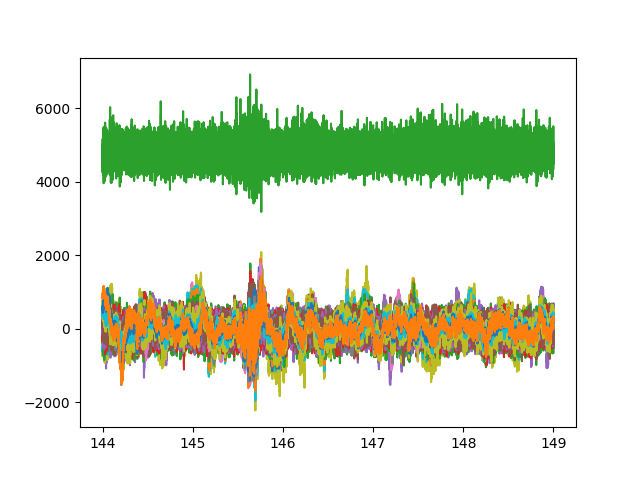

In [72]:

thedata.data['OE_LFP'].resetAlign()
start=45
thedata.data['OE_LFP'].reAlignTimes()
start=0
%matplotlib widget
mbTools.superCleanPlot(thedata.data['OE_LFP'], thedata.data['NPX'], canauxLFP=np.arange(0,32), canauxNPX=[2], scaleNPX=10, time=145-start) #structureLFP=['M1'], 

50382436
80019751
[50382436, 80019751]
20046.760055622886 52.082749458849776
1.0
MAE: 2.2737367544323206e-13
MSE: 3.2155493553843715e-13


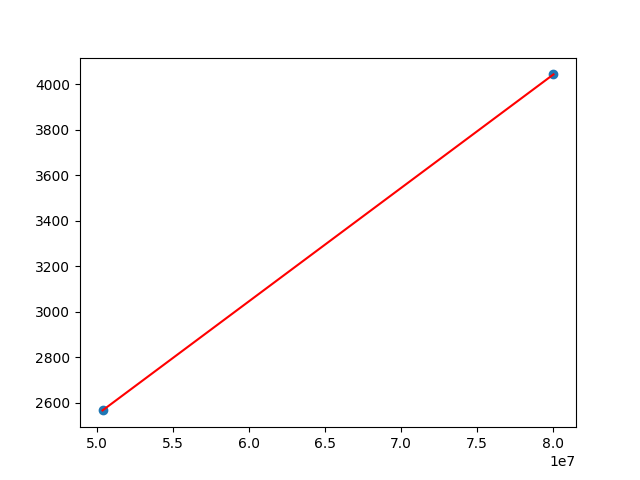

In [79]:

NPX=[2565.328573732, 4043.737798852]#145.636248852, 
timesreset=[2519.1218234716 , 4000.98758]#93.83060087425, 

thedata.data['OE_LFP'].resetAlign()
LFPpoint=[]
for t in timesreset:
    if t is not np.nan:
        p=mbTools.find_nearest(thedata.data['OE_LFP'].times,t)
    else:
        p=np.nan
    print(p)
    LFPpoint.append(p)
print(LFPpoint)
LFPpoint=np.array(LFPpoint).reshape(-1, 1)
NPX2=np.array(NPX).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error 

reg = LinearRegression()
reg.fit(LFPpoint,NPX2)
freq = 1/reg.coef_[0][0]
start = reg.intercept_[0]
print(freq, start)
thedata.data['OE_LFP'].sampling_rate=freq
thedata.data['OE_LFP'].start=start

print(reg.score(LFPpoint, NPX2)) 

y_pred = reg.predict(LFPpoint) 
mae = mean_absolute_error(y_true=NPX2,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = root_mean_squared_error(y_true=NPX2,y_pred=y_pred) #default=True 

print("MAE:",mae) 
print("MSE:",mse) 

thedata.data['OE_LFP'].updateParser('start',start)
thedata.data['OE_LFP'].updateParser('freq',freq)
thedata.data['OE_LFP'].updateParser('NPX',NPX)
thedata.data['OE_LFP'].updateParser('timesreset',timesreset)

plt.close()
plt.plot(LFPpoint,y_pred,color='r')
plt.scatter(LFPpoint,NPX)
plt.show()

ok, fitting is good with plenty of artefacts to realign, now let's try to find a function that depends on timestamps, number of points theoric frequencies...
first; let's try to see how many samples are recorded by npx at the end of recording compared to LFP

In [80]:
sizeLFP=thedata.data['OE_LFP'].signal.shape[0]
print(sizeLFP)

sizeNPX=thedata.data['NPX'].signal['spike'].get_num_frames()
print(sizeNPX)
print(thedata.data['NPX'].times.shape)

print(thedata.data['NPX'].times)
print(thedata.data['OE_LFP'].times)

thedata.data['OE_LFP'].reAlignTimes()

lastT=thedata.data['NPX'].times[-1]
idx=mbTools.find_nearest(thedata.data['OE_LFP'].times,lastT)
print(idx)
print(thedata.data['OE_LFP'].times[idx])
print(sizeLFP-idx)
print(idx%1024)


lastT=thedata.data['OE_LFP'].times[-1]
idx=mbTools.find_nearest(thedata.data['NPX'].times,lastT)
print(idx)
print(thedata.data['NPX'].times[idx])
print(sizeNPX-idx)
#there are 693 npx samples recorded after stop


107326464
162555120
(162555912,)
[4.11336560e-02 4.11669120e-02 4.12001720e-02 ... 5.40590929e+03
 5.40590933e+03 5.40590936e+03]
[0.00000000e+00 5.00000005e-05 1.00000001e-04 ... 5.36632310e+03
 5.36632315e+03 5.36632320e+03]
107326463
5405.888736172206
1
1023
162555291
5405.888741208
-171


the recordings seem to end together, it might be a coincidence that recording stops so near a multiple of 1024 => should make sure on another experiment.
Now, let's see if we can use the end of recordin and a single artefact to realign everything

In [ ]:
thedata.data['OE_LFP'].resetAlign() #so that lfpT is correct

#let's try with first artefact as pt 1
npxT1= NPX[0] #57.079179468   #213.831317136 #214.083826084  #459096    
lfpT1= timesreset[0] #5.64385005  #162.7626014 #163.0008 #6385152
idx1=mbTools.find_nearest(thedata.data['OE_LFP'].times,lfpT1)
print(idx1)
print(thedata.data['OE_LFP'].times[idx1])

if False:
    #let's try with last artefact as pt 2
    npxT2= NPX[-1] #57.079179468   #213.831317136 #214.083826084  #459096    
    lfpT2= timesreset[-1] #5.64385005  #162.7626014 #163.0008 #6385152
    idx2=mbTools.find_nearest(thedata.data['OE_LFP'].times,lfpT2)
    print(idx2)
    print(thedata.data['OE_LFP'].times[idx2])
else:
    #let's try with end of file
    endoffset=-243
    print(thedata.data['OE_LFP'].signal.shape[0])
    npxT2=thedata.data['NPX'].times[thedata.data['NPX'].signal['spike'].get_num_frames()-endoffset]
    print(npxT2)
    #lfpT2= thedata.data['NPX'].times[-endoffset]
    idx2=thedata.data['OE_LFP'].signal.shape[0]
    print(idx2)
    print(thedata.data['OE_LFP'].signal.shape[0]-endoffset)
    


dn=idx2-idx1
print(f"dn measured with lfp : {dn}")



#iNPX=mbTools.find_nearest(thedata.data['NPX'].times,npxT1)
#print(iNPX)

#print(f"dt measured with npx : {thedata.data['NPX'].times[-1]-npxT}")
#npxdt=thedata.data['NPX'].times[-1]-npxT


#print(npxT-lfpT)



#print(thedata.data['NPX'].times)
#print(thedata.data['OE_LFP'].times)
#thedata.data['OE_LFP'].times+=(thedata.data['NPX'].times[-1]-thedata.data['OE_LFP'].times[-1])
#print(thedata.data['OE_LFP'].times)

#dt=thedata.data['OE_LFP'].times[-1]-npxT1

dt=npxT2-npxT1
print(f"dt measured with lfp : {dt}")



freqC=dn/dt
print("the calculated freq is :", freqC)
print("while it previously was: ", thedata.data['OE_LFP'].sampling_rate)
print("diff is: ", thedata.data['OE_LFP'].sampling_rate-freqC)


#thedata.data['OE_LFP']
#realign(offset=0, freq=freqC)
#print("times npx", thedata.data['NPX'].times)
#print("times lfp", thedata.data['OE_LFP'].times)
#offsetC=-(thedata.data['OE_LFP'].times[-1]-thedata.data['NPX'].times[-1])
#print("calculated offset", offsetC)

#realign(offset=offsetC, freq=freqC)

#superCleanPlot(55)



### Load extra stuff

In [ ]:
from mbTools import mbTools
All_Spindle, M1 = thedata.data['OE_LFP'].loadSpindles(relativePath='../LFP', structure = "M1")
combined['LFP_DS']=M1[:,np.newaxis]
channelLabels['LFP_DS'] = ['M1_DS']
freqInitTheoric=20000
freqDS=1000
realignFactor=freqInitTheoric/sample_rates['LFP']
sample_rates['LFP_DS']=freqDS*realignFactor
t_start['LFP_DS']=t_start['LFP']
print(realignFactor)

In [12]:

M1_i=thedata.data['OE_LFP'].combineStructures(['M1'])[:,0]
M1_1=thedata.data['OE_LFP'].signal[:,16]
M1_2=thedata.data['OE_LFP'].signal[:,17]
M1_iL=thedata.data['OE_LFP'].channelLabels[:]
print(M1_1.shape)
print(M1_2.shape)
print(M1_i.shape)
combined['LFP'] = np.stack([M1_i,M1_1, M1_2], axis = 1) #cortex, filt_cortex, proj_cortexC, proj_cortex
print(combined['LFP'].shape)
channelLabels['LFP'] = ['M1_iL','ch16','ch17']



M1 -> [{'canal': 17, 'status': 1}, {'canal': 16, 'status': 2}]
Getting differential signal of channel 16 - channel 17 for M1
(107326464,)
(107326464,)
(107326464,)
(107326464, 3)


## Display

In [ ]:
#this cell can be used to plot very precisely time of interest. Beware that it conflicts with ephyviewer however. It might be possible to have 2 notebooks open simultanéeously...
thedata.data['OE_LFP'].reAlignTimes()
if True:
    %matplotlib widget
    #you can confiure a y-offset and some scaling, have a look at the help of superCleanPlot
    #artefacts=[55, 2649, 2709, 5362]
    mbTools.superCleanPlot(thedata.data['OE_LFP'], thedata.data['NPX'], canauxLFP=np.arange(0,32), canauxNPX=[0], scaleNPX=10, time=5362) #structureLFP=['M1'], 
    #picFN = os.path.sep.join([theExpe.rawDataPath,'A1-8978.svg'])
    #plt.savefig(picFN, format="svg")

In [15]:
# write here the rough times of artifacts on NPX and run the cell so that the list is accessible above
artefacts=[117, 145, 2016, 2563, 4044]

In [13]:
%gui qt
app = mkQApp()


try:
    TTL = Timestamps

    #create 2 familly scatters from theses 2 indexes
    scatter_indexes = {0: TTL, 1: TTL}
    #and asign them to some channels each
    scatter_channels = {0: [0, 12], 1: [0, 1]}
    #source = AnalogSignalSourceWithScatter(combined, sample_rate, t_start, scatter_indexes, scatter_channels)
except Exception:
    pass

#Create the main window that can contain several viewers
win = MainViewer(debug=True)

if 'LFP' in combined:
    print(sample_rates['LFP'], t_start['LFP'])
    source = InMemoryAnalogSignalSource(combined['LFP'], sample_rates['LFP'], t_start['LFP'], channel_names=channelLabels['LFP'])
    view1 = TraceViewer(source=source, name = 'LFP')

    #Parameters can be set in script
    view1.params['display_labels'] = True
    view1.params['scale_mode'] = 'same_for_all'
    view1.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view1.by_channel_params.children())
    for ch in range(nCh):
        #view1.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view1.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view1.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

    #create a time freq viewer conencted to the same source
    view2 = TimeFreqViewer(source=source, name='tfr')
    view2.params['show_axis'] = False
    view2.params['timefreq', 'deltafreq'] = 1
    #view2.by_channel_params['ch3', 'visible'] = False
    view2.auto_scale()

    win.add_view(view1)
    #win.add_view(view2)

if False:#'LFP_DS' in combined:

    if All_Spindle is not None:
        #Create one data source with 3 event channel
        all_events = []
        conditions = ['All','Good','Bad']
        for c,cond in enumerate(conditions):
            match cond:
                case 'All':
                    selection = "All_Spindle['toKeep'] | ~All_Spindle['toKeep']"
                case 'Good':
                    selection = "All_Spindle['toKeep']"
                case 'Bad':
                    selection = "~All_Spindle['toKeep']"
            ev_times = mbTools.convertTheoricIndex2realTime(All_Spindle.loc[pd.eval(selection),'peak time'].values, realFreq=sample_rates['LFP_DS'], offset=t_start['LFP_DS'])
            ev_labels = [f'spindle {i}'for i in All_Spindle[pd.eval(selection)].index]
            all_events.append({ 'time':ev_times, 'label':ev_labels, 'name': conditions[c] })
        source_ev = InMemoryEventSource(all_events=all_events)

        Spindle_peak = All_Spindle['peak time'].astype(int)
        Spindle_start = All_Spindle['start time'].astype(int)
        Spindle_end = All_Spindle['end time'].astype(int)

        #create 2 familly scatters from theses 2 indexes
        scatter_indexes = {0: Spindle_peak, 1: Spindle_start, 2: Spindle_end}
        #and asign them to some channels each
        scatter_channels = {0: [0], 1: [0], 2: [0]}
        source = AnalogSignalSourceWithScatter(combined['LFP_DS'], sample_rates['LFP_DS'], t_start['LFP_DS'], scatter_indexes, scatter_channels)#, channel_names=channelLabels['LFP_DS']
        view_Events = EventList(source=source_ev, name='event')
        
    else:
        source = InMemoryAnalogSignalSource(combined['LFP_DS'], sample_rates['LFP_DS'], t_start['LFP_DS'], channel_names=channelLabels['LFP_DS'])
        view_Events = None
    view_DS = TraceViewer(source=source, name = 'LFP_DS')

    #Parameters can be set in script
    view_DS.params['display_labels'] = True
    view_DS.params['scale_mode'] = 'same_for_all'
    view_DS.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view_DS.by_channel_params.children())
    for ch in range(nCh):
        #view_DS.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view_DS.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view_DS.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

    win.add_view(view_DS)
else:
    view_Events=None


if 'NPX' in combined:
    sig_source = SpikeInterfaceRecordingSource(recording=combined['NPX'])
    #view3 = TraceViewer.from_numpy(combined['NPX'], sample_rates['NPX'], t_start['NPX'], 'NPX', channel_names=channelLabels['NPX'])
    view3 = TraceViewer(source=sig_source, name='NPX')
    win.add_view(view3)

    #Parameters can be set in script
    view3.params['display_labels'] = True
    view3.params['scale_mode'] = 'same_for_all'
    view3.auto_scale()
    
    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view3.by_channel_params.children())
    for ch in range(nCh):
        #view3.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view3.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view3.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass


if view_Events is not None:
    win.add_view(view_Events)


#Run
win.show()
#app.exec()  #if commented, the app is shown and fonctionnal. Maybe detecting buttons. the Python icon doesn't close any better

debug True
QT_MODE PySide6
20000 52
auto_scale same_for_all
compute_auto_clim
[ True False False]
refresh duration for LFP 0.0 s
refresh duration for LFP 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0010318756103515625 s


refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0009698867797851562 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.000997304916381836 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.000997781753540039 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0009968280792236328 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for NPX 0.0009

### Extract submatrix of interest